## Bike Sharing Demand



The "Seoul Bike Sharing Demand" dataset focuses on bike-sharing rental demand in Seoul, South Korea. The dataset contains various features that help predict bike rental demand, such as weather conditions, temperature, humidity, wind speed, visibility, and if the day is a holiday or not.

The dataset"s primary goal is to help understand and predict the factors that influence bike rental patterns in the city. By analyzing these variables, companies can optimize the availability of bikes, predict peak times, and improve the efficiency of bike-sharing systems.

* Date: The date when the bikes were rented.
* Rented Bike Count: The number of bikes rented per hour.
* Hour: The specific hour of the day (ranging from 0 to 23) when bikes were rented.
* Temperature: Temperature in Celsius at the time of bike rental.
* Humidity: Percentage of humidity in the air.
* Windspeed: Wind speed measured in meters per second.
* Visibility: Visibility in 10-meter units, indicating how far one can see clearly.
* Dew Point Temperature: Dew point temperature in Celsius.
* Solar Radiation: Solar radiation measured in megajoules per square meter.
* Rainfall: Rainfall in millimeters.
* Snowfall: Snowfall in centimeters.
* Seasons: The season during which the bike was rented (Winter, Spring, Summer, Autumn).
* Holiday: A flag indicating whether the rental occurred on a holiday.
* Functional Day: Indicates whether the bike-sharing system was operational (functional hours or non-functional hours)​

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv file
df = pd.read_csv("SeoulBikeData.csv", encoding = "latin-1", parse_dates = ["Date"])

# head 5 line 
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.isnull().sum().sum()

0

In [5]:
# object columns convert to categorical columns

df = df.apply(lambda col: col.astype("category") if col.dtype == "object" else col)


In [6]:
# setting datetime column

df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)

In [7]:
df["Date_year"] = df["Date"].dt.year
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
del df["Date"]

In [8]:
# check changes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  Functioning Day            8760 non-null   category
 13  Date_year                  8760 n

In [9]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Date_year,Date_month,Date_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == "category"]


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
cat_cols = df.select_dtypes(include=['category']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(df[cat_cols])

# Convert the resulting numpy array back into a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(cat_cols))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis = 1)

# Drop the original categorical columns if necessary
df = df.drop(cat_cols, axis = 1)


In [12]:
print(df.columns)


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Date_year',
       'Date_month', 'Date_day', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes'],
      dtype='object')


<Axes: >

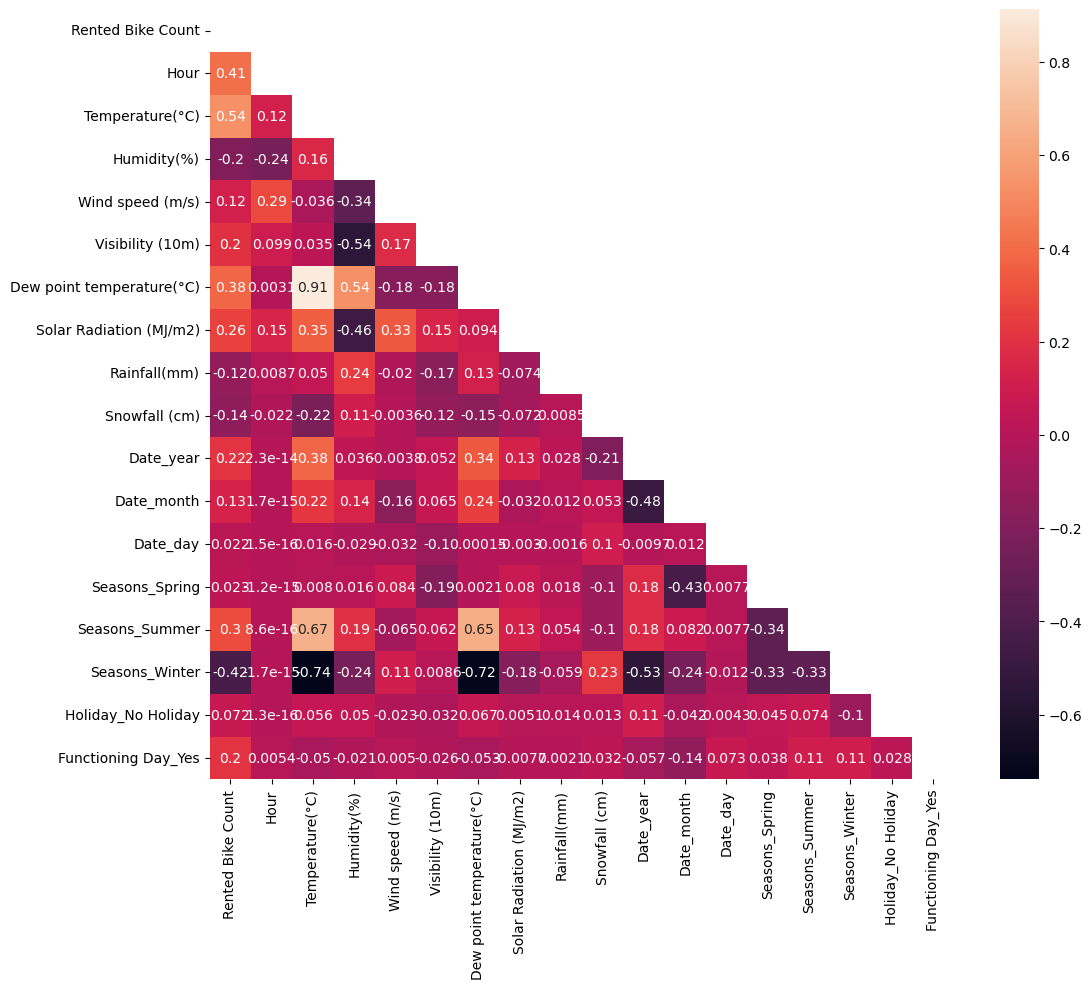

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# masking trio
mask = np.triu(np.ones_like(df.columns, dtype = bool))
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, mask = mask)

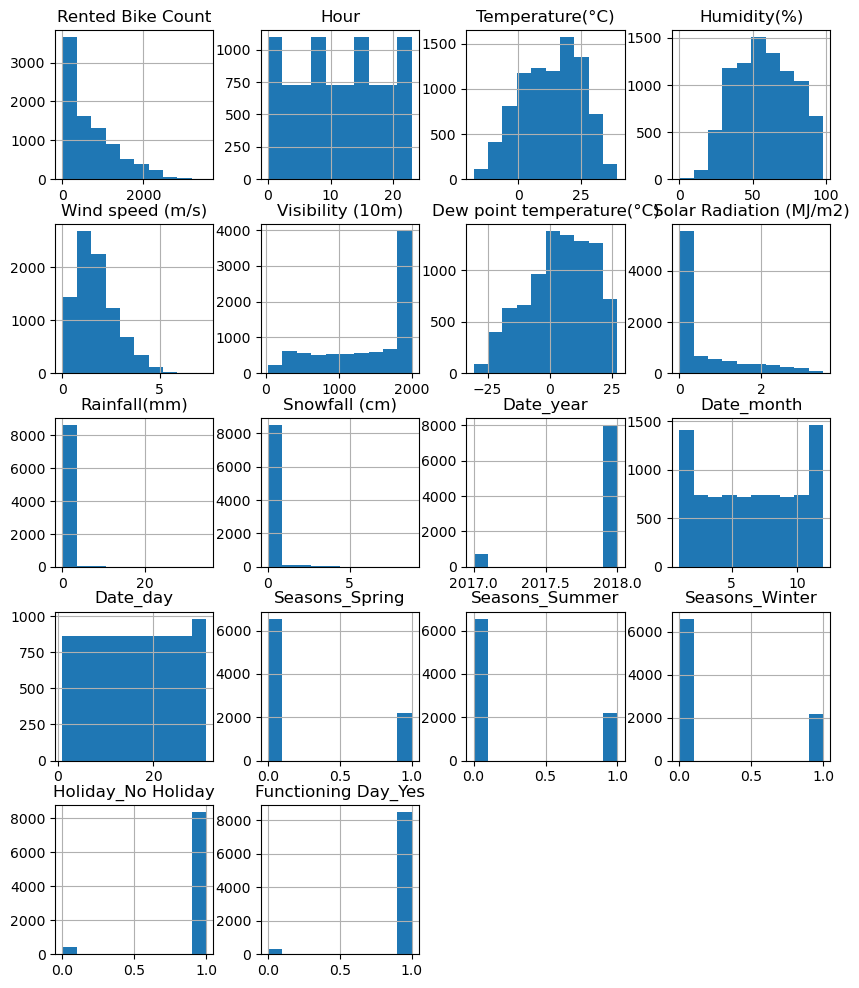

In [16]:
df.hist(figsize = (10, 12))
plt.show()

In [18]:
# define depended and indepeded columns
X = df.loc[:, df.columns[1:]]
y = df["Rented Bike Count"]

In [19]:
# Splitting train and test datas

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler only on the training data
scaler.fit(X_train)

# Transform both the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [40]:
# define Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# receive importances  using rf.
feature_importances = rf.feature_importances_

# feature convert to dataframe 
features = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance': feature_importances
})


In [41]:
# sorting features
features_sorted = features.sort_values(by = 'Importance', ascending = False)

# show feature importances
print(features_sorted)

                      Feature  Importance
1             Temperature(°C)    0.301318
0                        Hour    0.280987
6     Solar Radiation (MJ/m2)    0.089074
2                 Humidity(%)    0.082578
16        Functioning Day_Yes    0.080193
7                Rainfall(mm)    0.035660
5   Dew point temperature(°C)    0.031041
14             Seasons_Winter    0.023636
10                 Date_month    0.022392
11                   Date_day    0.016739
3            Wind speed (m/s)    0.015520
4            Visibility (10m)    0.014126
15         Holiday_No Holiday    0.002719
13             Seasons_Summer    0.001588
12             Seasons_Spring    0.001401
8               Snowfall (cm)    0.000763
9                   Date_year    0.000265


## Lazy Regressor

The Lazy Regressor model was chosen to determine the best model.

In [ ]:

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit LazyRegressor to training and test data
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)


In [30]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# models for pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  #standardization process
    ('regressor', LinearRegression())  
])


param_grid = [
    {
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': [True, False]
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [100, 500],
        'regressor__max_depth': [None, 10, 20]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [100, 500],
        'regressor__learning_rate': [0.01, 0.1],
        'regressor__max_depth': [3, 5, 10]
    },
    {

        'regressor': [LGBMRegressor()],
        'regressor__n_estimators': [100, 500, 1000],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 8],
        'regressor__num_leaves': [20, 50, 100]                      
}
]



In [31]:
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV
grid_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = 5, scoring = 'neg_mean_squared_error')

# Fit model
grid_search.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 5606, number of used features: 17
[LightGBM] [Info] Start training from score 705.504460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('regressor',
                                              LinearRegression())]),
                   param_distributions=[{'regressor': [LinearRegression()],
                                         'regressor__fit_intercept': [True,
                                                                      False]},
                                        {'regressor': [Ridge()],
                                         'regressor__alpha': [0.1, 1.0, 10.0]},
                                        {'regressor': [Lasso()],
                                         'regressor__alpha': [0.01, 0.1, 1.0,
                                                              10.0]},
                                        {'regressor': [Random...
                                        {'regressor': [GradientBoostingRegressor()],
                                         'regressor__learning_rate': [0.01,
                                                                      0.1],
                                         'regressor__max_depth': [3, 5, 10],
                                         'regressor__n_estimators': [100, 500]},
                                        {'regressor': [LGBMRegressor()],
                                         'regressor__learning_rate': [0.01,
                                                                      0.05,
                                                                      0.1],
                                         'regressor__max_depth': [3, 5, 8],
                                         'regressor__n_estimators': [100, 500,
                                                                     1000],
                                         'regressor__num_leaves': [20, 50,
                                                                   100]}],
                   scoring='neg_mean_squared_error')

In [33]:
# Print the best parameters and score

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'regressor__num_leaves': 50, 'regressor__n_estimators': 500, 'regressor__max_depth': 8, 'regressor__learning_rate': 0.1, 'regressor': LGBMRegressor()}
Best Score: -43200.093672070616


In [34]:

# create model with best params
model = LGBMRegressor(learning_rate = 0.1, max_depth = 8, n_estimators = 500, num_leaves = 50)
# fitting model (train)
model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 17
[LightGBM] [Info] Start training from score 703.811501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMRegressor(max_depth=8, n_estimators=500, num_leaves=50)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

y_pred = model.predict(X_test)


# calculate RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# calculate R2_score
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R2 Score: 0.9061484969405943
Root Mean Squared Error (RMSE): 198.87214077177734
